In [15]:
include(joinpath("src", "dataSplit.jl"))

Main.dataSplit

In [16]:
df = dataSplit.getDF("./data_proj_414.csv");
title = names(df);

In [17]:
data = df;
data_X = data[:,2];
data_Y = data[:,3];
data_Potter = data[:,4];
data_Weasley = data[:,5];
data_Granger = data[:,6];
data_Trip = data[:,7];
data_Close = data[:,8];
data_Far = data[:,9];

In [18]:
P = dataSplit.ListDataSplite([data_X,data_Y,data_Trip,data_Close,data_Far],data_Potter,1);
W = dataSplit.ListDataSplite([data_X,data_Y,data_Trip,data_Close,data_Far],data_Weasley,1);
G = dataSplit.ListDataSplite([data_X,data_Y,data_Trip,data_Close,data_Far],data_Granger,1);

In [19]:
print(length(data_X),", ",length(P[1]),", ",length(W[2]),", ",length(G[3]),", ",length(P[1])+length(W[2])+length(G[3]))

24094, 8000, 8336, 7758, 24094

In [20]:
P_trip = dataSplit.get_trip(P);
W_trip = dataSplit.get_trip(W);
G_trip = dataSplit.get_trip(G);

In [21]:
using Plots
# gr();
pyplot()
p1 = dataSplit.getPic(P_trip, :haline, 2)
p2 = dataSplit.getPic(W_trip, :inferno, 2)
p3 = dataSplit.getPic(G_trip, :ice, 2)
# p4 = getPic(G_trip, :bgy)

p4 =  dataSplit.scatter(P[1],P[2],markersize = 2,markerstrokewidth = 0,markercolor = :orange,
    xlims = (0,107), xticks = 0:10:107, ylims = (0,107), yticks = 0:10:107)
p4 = dataSplit.scatter!(W[1],W[2],markersize = 2,markerstrokewidth = 0,markercolor = :deepskyblue)
p4 = dataSplit.scatter!(G[1],G[2],markersize = 2,markerstrokewidth = 0,markercolor = :limegreen)
# plot(p1)
plot(p1,p2,p3,p4,layout=(2,2),legend=false, fmt = :png)

In [22]:
# savefig("pic/fig1.eps")
# savefig("pic/fig1.png")
# savefig("pic/fig1.svg")

In [23]:
function get_weight(X,Y,Weight)
    P_trip = []
    kk = maximum(Weight)
    for i = 1:kk
        current_trip = dataSplit.ListDataSplite([X,Y,Weight],Weight,i);
        push!(P_trip,current_trip)
    end
    return P_trip
end

get_weight (generic function with 1 method)

In [24]:
# P: data_X,data_Y,data_Trip,data_Close,data_Far
# P = dataSplit.ListDataSplite([data_X,data_Y,data_Trip,data_Close,data_Far],data_Potter,1);

# P_W = get_weight(X,Y,Weight);
# X

In [126]:
function getWeightPic(X,Y,Weight, color = :inferno, markersize = 1)
    ## color is a list of color, you should change the color and data
    ## you can find colors at: http://docs.juliaplots.org/latest/colors/#misc
#     kk = length(P_trip)
    kk = Int(maximum(Weight))
    print(kk)
    P_W = get_weight(X,Y,Weight)
    colors = RGBA[cgrad(color)[z] for z=range(0,stop=1,length=kk)]
#     pic = scatter()
    
    pic = scatter()
    
    for i = 2:kk
        color_s = colors[i]
        if i == 1
            color_s = :green
        end
        pic = scatter!(P_W[i][1], P_W[i][2], markersize = markersize, markerstrokewidth = 0,
            markercolor = color_s, size=(600,400), leg=true, xlims = (0,107), xticks = 0:10:107,
            ylims = (0,107), yticks = 0:10:107,label=i-1,zcolor = i-1,m=(color, 0.8))
    end
    i = 1
    color_s = :green
    pic = scatter!(P_W[i][1], P_W[i][2], markersize = markersize, markerstrokewidth = 0,
            markercolor = color_s, size=(600,400), leg=false, xlims = (0,107), xticks = 0:10:107,
            ylims = (0,107), yticks = 0:10:107,label=i-1)
    return pic
end

getWeightPic (generic function with 3 methods)

In [127]:
Int(10.0)

10

28

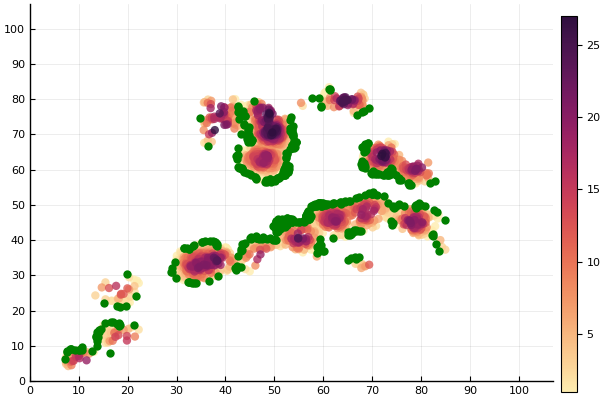

In [130]:

using Plots
pyplot();
X = P[1]
Y = P[2]
Weight = P[5]
pw = getWeightPic(X,Y,Weight,:matter,6);
plot(pw)

In [28]:
maximum(P[1])

85.1433691766096

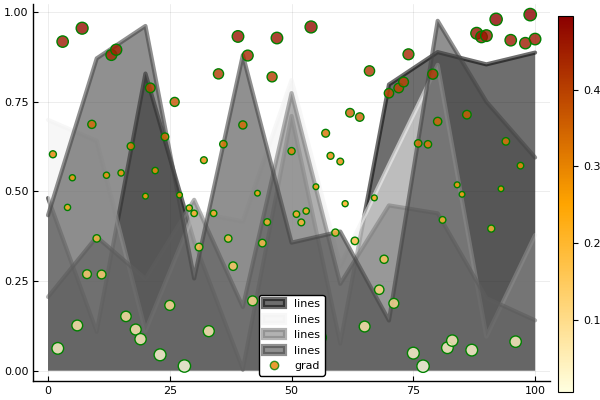

In [91]:
y = rand(100)

plot(0:10:100, rand(11, 4), lab="lines", w=3, palette=:grays, fill=0, α=0.6)
scatter!(y, zcolor=y/2, m=(:heat, 0.8, Plots.stroke(1, :green)), ms=10 * abs.(y .- 0.5) .+ 4, lab="grad")

In [88]:
zcolor=abs.(y .- 0.5)
# typeof(zcolor)
# z = rand(100)

100-element Array{Float64,1}:
 0.32102788931350545 
 0.028957320735059522
 0.4072064337478971  
 0.28697390199610306 
 0.3450377626766916  
 0.391016323492809   
 0.4642503366842168  
 0.08669570686155614 
 0.4810981431335952  
 0.035703443887384   
 0.4398713948987145  
 0.01572059346912491 
 0.19318878812662765 
 ⋮                   
 0.02664367827489622 
 0.3629517077709097  
 0.4828236657303189  
 0.08868763166630167 
 0.13399753734841058 
 0.07009609607813538 
 0.12779333530934833 
 0.2379980870037246  
 0.3286070232348437  
 0.13826235302862755 
 0.4081719448387253  
 0.27792134851586203 